<a href="https://colab.research.google.com/github/subramanian72/Industrial-Copper-Project/blob/main/IndCopperPrj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Industrial Copper Model Project***

In [1]:
# Libraries imported
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!ls -l /content/Copper_Set.xlsx

-rw-r--r-- 1 root root 13631488 Mar 18 12:45 /content/Copper_Set.xlsx


In [2]:
df = pd.read_excel('Copper_Set.xlsx', sheet_name=0)

In [3]:
df.shape

(181673, 14)

In [4]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [5]:
df['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [6]:
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [7]:
df['status'].value_counts()

Won                116010
Lost                34438
Not lost for AM     19573
Revised              4276
To be approved       4170
Draft                3140
Offered                53
Offerable              10
Wonderful               1
Name: status, dtype: int64

In [8]:
#drop the status values other than Won and Lost

indexAge = df[ (df['status'] != 'Won') & (df['status'] != 'Lost') ].index
df.drop(indexAge , inplace=True)
df.head(10)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
5,FE372230-29B1-4A29-BB73-CB9D3078C286,20210401.0,225.790676,30202938.0,25.0,Won,W,41.0,1.50,1265.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.00
7,AA3F18A2-A7D6-43DE-8644-F0632AE2CB68,20210401.0,113.387124,30342192.0,32.0,Won,W,41.0,0.68,1220.0,0000000000000000000000000000000001000944,611993,20210101.0,931.00
8,2851F48B-DA32-4DF3-884B-17A3100DD65A,20210401.0,69.071853,30341428.0,38.0,Won,S,10.0,0.60,1275.0,0000000000000000000000000000000000106786,1668701376,20210701.0,1363.00
9,6E4D638C-A820-4A40-836F-C9D48BC65528,20210401.0,630.626917,30202938.0,25.0,Won,W,41.0,1.50,1165.0,0000000000000000000000000000000000102325,1668701718,20210401.0,983.00
11,CA076845-2EDE-4C02-95BE-6C7B842026E8,20210401.0,113.995666,30342192.0,32.0,Won,W,41.0,0.55,1220.0,0000000000000000000000000000000001000063,611993,20210101.0,954.00


In [9]:
df.shape

(150448, 14)

In [10]:
df['status'].unique()

array(['Won', 'Lost'], dtype=object)

In [11]:
df.isnull().sum()

id                   1
item_date            1
quantity tons        0
customer             1
country              4
status               0
item type            0
application          3
thickness            0
width                0
material_ref     62799
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [12]:
df.drop('material_ref', 1, inplace=True)

<ipython-input-12-e6a00f15702a>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('material_ref', 1, inplace=True)


In [13]:
df.isnull().sum()

id               1
item_date        1
quantity tons    0
customer         1
country          4
status           0
item type        0
application      3
thickness        0
width            0
product_ref      0
delivery date    1
selling_price    1
dtype: int64

In [14]:
df = df.dropna()

In [15]:
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [16]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00


In [17]:
df.drop('id', 1, inplace=True)

<ipython-input-17-b82a3da1a97c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('id', 1, inplace=True)


In [18]:
df.head(5)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150439 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      150439 non-null  float64
 1   quantity tons  150439 non-null  object 
 2   customer       150439 non-null  float64
 3   country        150439 non-null  float64
 4   status         150439 non-null  object 
 5   item type      150439 non-null  object 
 6   application    150439 non-null  float64
 7   thickness      150439 non-null  float64
 8   width          150439 non-null  float64
 9   product_ref    150439 non-null  int64  
 10  delivery date  150439 non-null  float64
 11  selling_price  150439 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 14.9+ MB


In [ ]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.504390e+05,1.504390e+05,150439.000000,150439.000000,150439.000000,150439.000000,1.504390e+05,1.504390e+05,150439.000000
mean,2.020457e+07,3.023288e+07,45.390923,25.195355,2.618290,1297.838602,4.748562e+08,2.020729e+07,825.767889
std,4.553550e+03,1.056099e+05,24.488173,17.640231,7.115612,266.161130,7.172701e+08,4.427748e+03,290.885323
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1160.000000
25%,2.020093e+07,3.019689e+07,26.000000,10.000000,0.740000,1176.000000,6.283770e+05,2.020100e+07,671.000000
50%,2.020120e+07,3.020531e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,811.000000
75%,2.021020e+07,3.027982e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,951.000000
max,2.021040e+07,3.040818e+07,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,2.022010e+07,81236.140000


<ipython-input-20-5fae30ba4060>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cbar=False,cmap='RdBu')
<ipython-input-20-5fae30ba4060>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
item_date,1.000000,0.006367,-0.025023,-0.013355,0.005614,0.026781,0.042425,0.591139,0.391823
customer,0.006367,1.000000,0.089512,0.011597,0.032568,0.044292,-0.034336,0.005202,-0.005214
country,-0.025023,0.089512,1.000000,-0.035610,-0.016236,0.057060,-0.152603,-0.067042,-0.010697
application,-0.013355,0.011597,-0.035610,1.000000,-0.057483,-0.213282,-0.116575,-0.053523,0.108738
thickness,0.005614,0.032568,-0.016236,-0.057483,1.000000,0.149316,0.036786,0.013565,-0.099327
width,0.026781,0.044292,0.057060,-0.213282,0.149316,1.000000,-0.041614,0.014562,-0.123256
product_ref,0.042425,-0.034336,-0.152603,-0.116575,0.036786,-0.041614,1.000000,0.086183,-0.071425
delivery date,0.591139,0.005202,-0.067042,-0.053523,0.013565,0.014562,0.086183,1.000000,0.324471
selling_price,0.391823,-0.005214,-0.010697,0.108738,-0.099327,-0.123256,-0.071425,0.324471,1.000000


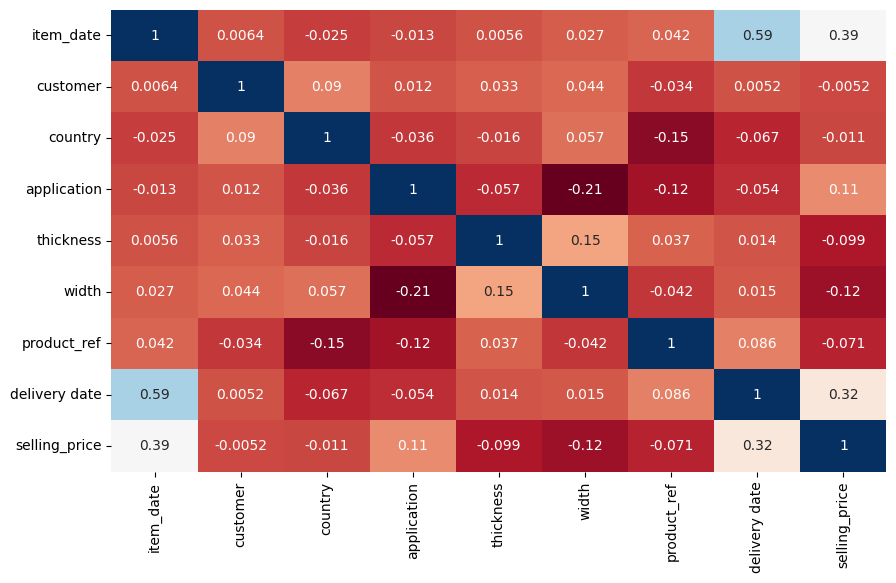

In [20]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cbar=False,cmap='RdBu')
df.corr()

<Axes: ylabel='selling_price'>

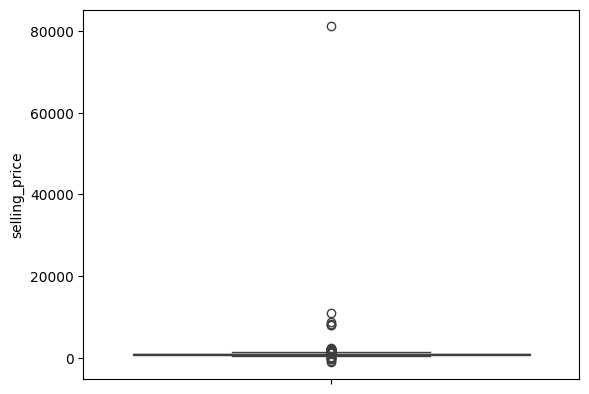

In [21]:
#to find outliers

sns.boxplot(df['selling_price'])

In [ ]:
df['selling_price'].value_counts()

821.00     333
811.00     327
812.00     324
816.00     324
832.00     323
          ... 
752.89       1
1223.63      1
846.01       1
822.88       1
859.50       1
Name: selling_price, Length: 8943, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150439 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      150439 non-null  float64
 1   quantity tons  150439 non-null  object 
 2   customer       150439 non-null  float64
 3   country        150439 non-null  float64
 4   status         150439 non-null  object 
 5   item type      150439 non-null  object 
 6   application    150439 non-null  float64
 7   thickness      150439 non-null  float64
 8   width          150439 non-null  float64
 9   product_ref    150439 non-null  int64  
 10  delivery date  150439 non-null  float64
 11  selling_price  150439 non-null  float64
dtypes: float64(8), int64(1), object(3)
memory usage: 14.9+ MB


In [23]:
# df['quantity tons'].head(10)
df = df[df['quantity tons'] != 'e']

In [24]:
df['quantity tons'] = df['quantity tons'].astype(float)
# df['quantity tons']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150438 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      150438 non-null  float64
 1   quantity tons  150438 non-null  float64
 2   customer       150438 non-null  float64
 3   country        150438 non-null  float64
 4   status         150438 non-null  object 
 5   item type      150438 non-null  object 
 6   application    150438 non-null  float64
 7   thickness      150438 non-null  float64
 8   width          150438 non-null  float64
 9   product_ref    150438 non-null  int64  
 10  delivery date  150438 non-null  float64
 11  selling_price  150438 non-null  float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ MB


In [26]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['status', 'item type'], dtype='object')


In [27]:
#Label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150438 entries, 0 to 181672
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item_date      150438 non-null  float64
 1   quantity tons  150438 non-null  float64
 2   customer       150438 non-null  float64
 3   country        150438 non-null  float64
 4   status         150438 non-null  int64  
 5   item type      150438 non-null  int64  
 6   application    150438 non-null  float64
 7   thickness      150438 non-null  float64
 8   width          150438 non-null  float64
 9   product_ref    150438 non-null  int64  
 10  delivery date  150438 non-null  float64
 11  selling_price  150438 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 14.9 MB
None


In [28]:
df.head(10)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,20210401.0,54.151139,30156308.0,28.0,1,5,10.0,2.00,1500.0,1670798778,20210701.0,854.00
1,20210401.0,768.024839,30202938.0,25.0,1,5,41.0,0.80,1210.0,1668701718,20210401.0,1047.00
2,20210401.0,386.127949,30153963.0,30.0,1,6,28.0,0.38,952.0,628377,20210101.0,644.33
3,20210401.0,202.411065,30349574.0,32.0,1,3,59.0,2.30,1317.0,1668701718,20210101.0,768.00
4,20210401.0,785.526262,30211560.0,28.0,1,5,10.0,4.00,2000.0,640665,20210301.0,577.00
5,20210401.0,225.790676,30202938.0,25.0,1,5,41.0,1.50,1265.0,1668701718,20210401.0,983.00
7,20210401.0,113.387124,30342192.0,32.0,1,5,41.0,0.68,1220.0,611993,20210101.0,931.00
8,20210401.0,69.071853,30341428.0,38.0,1,3,10.0,0.60,1275.0,1668701376,20210701.0,1363.00
9,20210401.0,630.626917,30202938.0,25.0,1,5,41.0,1.50,1165.0,1668701718,20210401.0,983.00
11,20210401.0,113.995666,30342192.0,32.0,1,5,41.0,0.55,1220.0,611993,20210101.0,954.00


In [29]:
df.shape

(150438, 12)

In [30]:
#Linear Regression Model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


X = df.drop(['status','selling_price'], axis=1)
y = df['selling_price']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse_lr)
print("Mean absolute error:", mae_lr)
print("R2 Score:", r2_lr)

Mean Squared Error: 24425.52013937551
Mean absolute error: 112.46198697029402
R2 Score: 0.42785107734049665


In [31]:
_#Random forest regressor

from sklearn.ensemble import RandomForestRegressor

# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(random_state=0, n_estimators=10)

# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

# Making predictions on the same data or new data
predictions = regressor.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse_rf}')

mae_rf = mean_absolute_error(y_test, predictions)
print(f'Mean Absoulte Error: {mae_rf}')

r2_rf = r2_score(y_test, predictions)
print(f'R-squared: {r2_rf}')

Mean Squared Error: 215910.3890836977
Mean Absoulte Error: 31.063880583621376
R-squared: -4.057533915361288


In [32]:
#Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor


dtr=DecisionTreeRegressor(max_depth=3, random_state=42)

dtr.fit(X_train,y_train)

pred = dtr.predict(X_test)

# evaluate the model on training sample
mse_dt = mean_squared_error(y_test, pred)
print(f'Mean Squared Error: {mse_dt}')

mae_dt = mean_absolute_error(y_test, pred)
print(f'Mean Absoulte Error: {mae_dt}')

R2_Score_dt = r2_score(y_test, pred)
print("R2 score:" , R2_Score_dt)

Mean Squared Error: 14491.34694367657
Mean Absoulte Error: 81.66588691088418
R2 score: 0.6605514030244263


# Regression Models and final result

In [33]:
scores_ = [("Random Forest", mse_rf, mae_rf, r2_rf),
("Linear Regression",  mse_lr, mae_lr, r2_lr),
         ("Decision Tree", mse_dt, mae_dt, R2_Score_dt)  ]

Scores =pd.DataFrame(data = scores_, columns=['Model Name', 'Mean square error', 'Mean absolute error', 'R2 Score'])
Scores.set_index('Model Name', inplace = True)

Scores

,Mean square error,Mean absolute error,R2 Score
Model Name,,,
Random Forest,215910.389084,31.063881,-4.057534
Linear Regression,24425.520139,112.461987,0.427851
Decision Tree,14491.346944,81.665887,0.660551


#Classification models



In [34]:
#Decision tree classifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

X = df.drop(['status','selling_price'], axis=1)
y = df['status']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DECISION TREE CLASSIFIER
dt = DecisionTreeClassifier(random_state=0)
# train the model
dt.fit(X_train, y_train)
# make predictions
dt_pred = dt.predict(X_test)
# print the accuracy
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Accuracy of Decision Tree Classifier: ",
      accuracy_score(y_test, dt_pred))
# print other performance metrics
dt_precision = precision_score(y_test, dt_pred, average='weighted')
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_f1score = f1_score(y_test, dt_pred, average='weighted')
print("Precision of Decision Tree Classifier: ",
      precision_score(y_test, dt_pred, average='weighted'))
print("Recall of Decision Tree Classifier: ",
      recall_score(y_test, dt_pred, average='weighted'))
print("F1-Score of Decision Tree Classifier: ",
      f1_score(y_test, dt_pred, average='weighted'))

Accuracy of Decision Tree Classifier:  0.9581228396703004
Precision of Decision Tree Classifier:  0.9582308508477978
Recall of Decision Tree Classifier:  0.9581228396703004
F1-Score of Decision Tree Classifier:  0.9581735404869443


In [35]:
# GAUSSIAN NAIVE BAYES
gnb = GaussianNB()
# train the model
gnb.fit(X_train, y_train)
# make predictions
gnb_pred = gnb.predict(X_test)
# print the accuracy

gnb_accuracy = accuracy_score(y_test, gnb_pred)
print("Accuracy of Gaussian Naive Bayes: ",
      accuracy_score(y_test, gnb_pred))
# print other performance metrics
gnb_precision = precision_score(y_test, gnb_pred, average='weighted')
gnb_recall = recall_score(y_test, gnb_pred, average='weighted')
gnb_f1score = f1_score(y_test, gnb_pred, average='weighted')
print("Precision of Gaussian Naive Bayes: ",
      precision_score(y_test, gnb_pred, average='weighted'))
print("Recall of Gaussian Naive Bayes: ",
      recall_score(y_test, gnb_pred, average='weighted'))
print("F1-Score of Gaussian Naive Bayes: ",
      f1_score(y_test, gnb_pred, average='weighted'))

Accuracy of Gaussian Naive Bayes:  0.7663520340335017
Precision of Gaussian Naive Bayes:  0.6867130673994873
Recall of Gaussian Naive Bayes:  0.7663520340335017
F1-Score of Gaussian Naive Bayes:  0.6809036351057384


In [40]:
# Random forest classifer

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)

# Evaluate the accuracy of the model
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", rf_accuracy)

rf_precision = precision_score(y_test, y_pred)
print("Precision: ", rf_precision)

rf_recall = recall_score(y_test, y_pred)
print("Recall: ", rf_recall)

rf_f1score = f1_score(y_test, y_pred)
print("F1Score: ", rf_f1score)


Accuracy: 0.9701542143047062
Precision:  0.979794933655006
Recall:  0.9814862765406525
F1Score:  0.980639875819248


In [41]:
cl_scores = [("Decision Tree", dt_accuracy, dt_precision, dt_recall, dt_f1score),
("GAUSSIAN NAIVE BAYES",  gnb_accuracy, gnb_precision , gnb_recall, gnb_f1score),
 ("Random Forest", rf_accuracy, rf_precision, rf_recall, rf_f1score)]

cl_Scores =pd.DataFrame(data = cl_scores, columns=['Model Name', 'Accuracy', 'Precision', 'Recall','F1 Score'])
cl_Scores.set_index('Model Name', inplace = True)

cl_Scores

,Accuracy,Precision,Recall,F1 Score
Model Name,,,,
Decision Tree,0.958123,0.958231,0.958123,0.958174
GAUSSIAN NAIVE BAYES,0.766352,0.686713,0.766352,0.680904
Random Forest,0.970154,0.979795,0.981486,0.980640
